In [1]:
import numpy as np
import extq
import matplotlib.pyplot as plt
from matplotlib import ticker
import pyemma
import glob
import sys
import importlib
import gc
import sklearn
from sklearn import metrics
import ivac
import seaborn as sns

In [14]:
sys.path.insert(1, "../../python")
sys.path.insert(1, "../../..")
import util
import kde
import plotting

In [3]:
plt.style.use("seaborn-ticks")
sns.set_palette("colorblind")

# Load data and CVs 

In [4]:
cv_trajs = np.load("../../data/raw_feat/cv_dist_spin_anton.npy", allow_pickle=True)

In [5]:
sb_labels = []
for r in ("R217", "R223", "R226", "R229", "R232"):
    for n in ("D129", "D136", "D151", "D164", "E183", "D186"):
        sb_labels.append(f"{r} - {n}")

In [6]:
remove = [
    1282,
    1283,
    1284,
    1285,
    1286,
    1288,
    1289,
    1290,
    1187,
    1188,
    1189,
    1190,
    1191,
    1197,
    1198,
    1199,
    1203,
    1205,
    1206,
    1207,
    1211,
    1212,
    1213,
    1214,
    1215,
    1225,
    1226,
    1227,
    1228,
    1231,
    1232,
    1233,
    1236,
    1237,
    1238,
    1242,
    1245,
    1246,
    1252,
    1253,
    1260,
    1261,
    1262,
    1263,
    1266,
    1267,
    1268,
    1269,
    1270,
    1271,
    1272,
    1273,
    1274,
    1275,
    1276,
    1277,
    1278,
    1279,
]

In [7]:
ivac_trajs = np.load("../../data/raw_feat/feat5_ivac_anton.npy", allow_pickle=True)
ivac_arr = np.concatenate(ivac_trajs)
print(len(ivac_trajs), ivac_trajs[0].shape)
print(ivac_arr.shape)

237 (10000, 10)
(3000000, 10)


In [8]:
sb_trajs = np.load("../../data/raw_feat/feat2_raw_anton.npy", allow_pickle=True)
sb_arr = np.concatenate(sb_trajs)
print(sb_trajs.shape)
print(sb_arr.shape)

(237,)
(3000000, 60)


# Plot IVAC data

In [9]:
sns.set_context("talk")

In [10]:
import random

random.seed(123)

In [11]:
s = 10
N = len(ivac_arr)
inds = random.sample(range(N), N // s)

In [12]:
cv_arr = np.concatenate(cv_trajs)

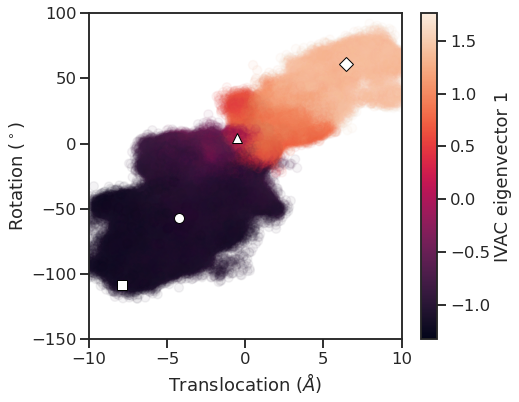

In [24]:
f, ax = plt.subplots(figsize=(7, 6))
h = ax.scatter(
    cv_arr[inds, 0], cv_arr[inds, 1], c=ivac_arr[inds, 1], cmap="rocket", alpha=0.05
)
plotting.format_cvs(ax, centroids=True)
cb = plt.colorbar(h, ax=ax, label="IVAC eigenvector 1")
cb.solids.set(alpha=1)
plt.savefig("../../fig/ivac/ivac1-feat5-ds", dpi=400, transparent=True)

In [17]:
import matplotlib as mpl

/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


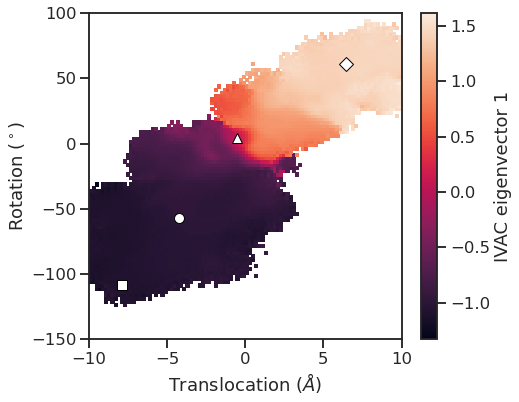

In [25]:
hist, xe, ye = np.histogram2d(
    *cv_arr.T, weights=ivac_arr[:, 1], bins=100, range=[[-10, 10], [-150, 100]]
)
hist_norm, _, _ = np.histogram2d(*cv_arr.T, bins=100, range=[[-10, 10], [-150, 100]])

f, ax = plt.subplots(figsize=(7, 6))
h = ax.pcolor(xe, ye, hist.T / hist_norm.T, cmap="rocket")
plotting.format_cvs(ax, centroids=True)
cb = plt.colorbar(h, ax=ax, label="IVAC eigenvector 1")
plt.savefig("../../fig/ivac/ivac1-feat5-ds-bin.svg", transparent=True)

In [ ]:
ivac_models = np.load("../../data/")

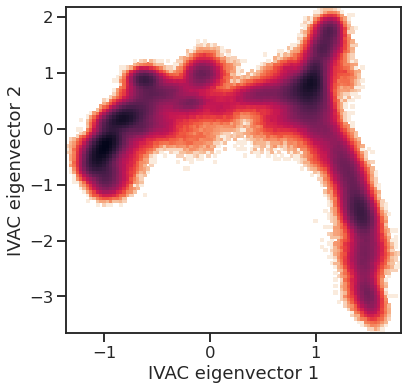

In [46]:
f, ax = plt.subplots(figsize=(6, 6))
hist, xe, ye = np.histogram2d(*ivac_arr[:, 1:3].T, bins=100, density=True)
h = ax.pcolor(xe, ye, hist.T, cmap="rocket_r", norm=mpl.colors.LogNorm())
ax.set(xlabel="IVAC eigenvector 1", ylabel="IVAC eigenvector 2")
# cb = f.colorbar(h, ax=ax, label='Density')
# cb.ax.tick_params(length=0)
plt.savefig("../../fig/ivac/ivac12-feat5-bin.png", dpi=400, transparent=True)